In [26]:
import pandas as pd
import numpy as np
import math
col=['sepal_len','sepal_width','petal_len','petal_width','type']
df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",names=col)


In [27]:
shuffled = df.sample(frac=1)
result = np.array_split(shuffled, 3)
x =result[0]
x1= result[1]
test =result[2]
dev = np.concatenate((x, x1), axis=0)
test = np.array(test)


In [28]:
import math
import statistics as st
def euclidean(tar,dat):
    stry =0.0
    for i in range (0,4):
        stry =stry+pow((tar[i]-dat[i]),2) 
    return math.sqrt(stry)



def cosine_similarity(tar,dat):
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(0,4):
        x = tar[i]; y = dat[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    #print(sumxy/math.sqrt(sumxx*sumyy))
    return sumxy/math.sqrt(sumxx*sumyy)

def normeuclidean(tar,dat):
    a=[]
    b=[]
    for i in range (0,4):
        a.append(tar[i])
        b.append(dat[i])
    c=[]
    for i in range (0,len(a)):
        c.append(a[i]-b[i])
         
    return 0.5*(pow(st.stdev(c),2)) / ((pow(st.stdev(a),2))+(pow(st.stdev(b),2)))

In [29]:
def equi(k,dataset):

    srt = [[0 for x in range(len(dataset))] for y in range(len(dataset))] 
    hyper =k
    fin =0
    for j in range (0,len(dataset)):
        mydct={}
        x={}
        for i in range (0,len(dataset)):
            mydct[(euclidean(dev[j],dev[i]))] = dev[i][4]
        count=0;
    #print(dev[j][4])
        mydct
        for i in sorted (mydct) : 
            if(count==0):
                count+=1;
                continue
            elif( count <= hyper):
                if mydct[i] in x:
                    x[mydct[i]]=(x[mydct[i]]+1)
                else:
                    x[mydct[i]] = 1
                count+=1
            else:
                break;
        if dev[j][4] in x:
            if(x[dev[j][4]]>=((hyper+1)/2)) :
                fin+=1
        
        #print(x)  
    return ((fin/len(dataset))*100)    



In [30]:
def cos(k,dataset):

    w, h = len(dataset), len(dataset);

    srt = [[0 for x in range(w)] for y in range(h)] 
    hyper =k
    fin =0
    for j in range (0,len(dataset)):
        mydct={}
        x={}
        for i in range (0,len(dataset)):
            mydct[(cosine_similarity(dev[j],dev[i]))] = dev[i][4]
        count=0;
    #print(dev[j][4])
        mydct
        for i in sorted (mydct,reverse=True) : 
            if(count==0):
                count+=1;
                continue
            elif( count <= hyper):
                if mydct[i] in x:
                    x[mydct[i]]=(x[mydct[i]]+1)
                else:
                    x[mydct[i]] = 1
                count+=1
            else:
                break;
        if dev[j][4] in x:
            if(x[dev[j][4]]>=((hyper+1)/2)) :
                fin+=1
        
        #print(x)  
    return ((fin/len(dataset))*100) 

In [31]:
def norm(k,dataset):

    w, h = len(dataset), len(dataset);

    srt = [[0 for x in range(w)] for y in range(h)] 
    hyper =k
    fin =0
    for j in range (0,len(dataset)):
        mydct={}
        x={}
        for i in range (0,len(dataset)):
            mydct[(normeuclidean(dev[j],dev[i]))] = dev[i][4]
        count=0;
    #print(dev[j][4])
        mydct
        for i in sorted (mydct) : 
            if(count==0):
                count+=1;
                continue
            elif( count <= hyper):
                if mydct[i] in x:
                    x[mydct[i]]=(x[mydct[i]]+1)
                else:
                    x[mydct[i]] = 1
                count+=1
            else:
                break;
        if dev[j][4] in x:
            if(x[dev[j][4]]>=((hyper+1)/2)) :
                fin+=1
        
        #print(x)  
    return ((fin/len(dataset))*100) 

In [32]:
count=0;
a=[]
b=[]
c=[]
print(len(dev))
for i in 1,3,5,7:
    a.append(equi(i,dev))
    b.append(cos(i,dev))
    c.append(norm(i,dev))
print(a,b,c)

100
[97.0, 95.0, 96.0, 97.0] [94.0, 96.0, 96.0, 96.0] [96.0, 96.0, 96.0, 96.0]


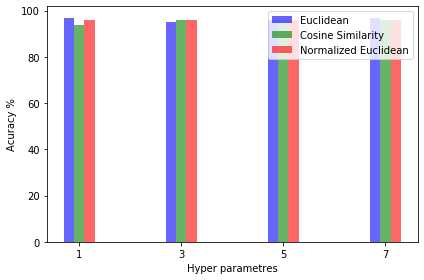

In [33]:
import matplotlib.pyplot as plt

# data to plot
n_groups = 4
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.6

rects1 = plt.bar(index, a, bar_width,
alpha=opacity,
color='b',
label='Euclidean')

rects2 = plt.bar(index + bar_width, b, bar_width,
alpha=opacity,
color='g',
label='Cosine Similarity')

rects3 = plt.bar(index + bar_width+ bar_width, c, bar_width,
alpha=opacity,
color='r',
label='Normalized Euclidean')

plt.xlabel('Hyper parametres')
plt.ylabel('Acuracy %')
plt.title('')
plt.xticks(index + bar_width, ('1', '3', '5', '7'))
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
print(len(test))
a= (equi(5,test))
b= (cos(5,test))
c= (norm(5,test))
print(a,b,c)

50
100.0 98.0 98.0


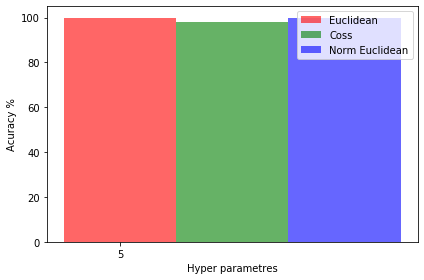

In [35]:
n_groups = 1
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
#bar_width = 0.1
opacity = 0.6

rects1 = plt.bar(index, a, bar_width,
alpha=opacity,
color='r',
label='Euclidean')
rects1 = plt.bar(index+bar_width, b, bar_width,
alpha=opacity,
color='g',
label='Coss')
rects1 = plt.bar(index+bar_width+bar_width, a, bar_width,
alpha=opacity,
color='b',
label='Norm Euclidean')


plt.xlabel('Hyper parametres')
plt.ylabel('Acuracy %')
plt.title('')
plt.xticks(index , ('5'))
plt.legend()

plt.tight_layout()
plt.show()

Refrences :https://pythonspot.com/matplotlib-bar-chart/

